# Import libraries

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import joblib

import os

# Import Data

In [2]:
# Tosin 

In [3]:
def import_data(file_path):
    # Read data from the specified file path
    df_raw=pd.read_csv(file_path)

    # Return the imported DataFrame
    return df_raw

# Cleaning Data

# Feature Engineering 

In [6]:
def calculate_alt_change(df):

    # Add new column with calculated Altitude Change  
    df['Alt(m)_change'] = df['Alt(m)'].diff().fillna(0)
    
    # Remove outliers 
    # Set the threshold value for filtering
    alt_threshold = 20
    
    # Filter the DataFrame based on the absolute value of 'Alt(m)_change' column
    df = df[df['Alt(m)_change'].abs() <= alt_threshold]
    
    return df 

# option to add log file later on
# print shape before and after outlier detection and removal 

In [7]:
def plot_alt_changes(df):
    
    # Create a histogram plot
    plt.hist(df['Alt(m)_change'], 
             bins=20, 
             color='skyblue', 
             edgecolor='black')
    
    #Add labels and title
    plt.xlabel('Altitude (m)')
    plt.ylabel('Frequency')
    plt.title('Altitude Changes')
    
    #Show the plot
    plt.show()

In [8]:
def calculate_speed_change(df):

    # Add new column with calculated Speed Change  
    df['Speed(m/s)_change'] = df['Speed(m/s)'].diff().fillna(0)

    # Remove outliers     
    # Set the threshold value for filtering
    threshold_speed = 3
    
    # Filter the DataFrame based on the absolute value of 'Speed(m/s)_change' column
    df = df[df['Speed(m/s)_change'].abs() <= threshold_speed]

    return df     
    
    # option to add log file later on
    # print shape before and after outlier detection and removal 

In [9]:
def plot_speed_changes(df):
    
    # Create a histogram plot
    plt.hist(df['Speed(m/s)_change'], 
             bins=20, 
             color='skyblue', 
             edgecolor='black')
    
    #Add labels and title
    plt.xlabel('Speed Change (m/s)')
    plt.ylabel('Frequency')
    plt.title('Speed Changes')
    
    #Show the plot
    plt.show()

In [10]:
def calculate_course_change(df):

    # Add new column with calculated Course Change  
    df['Course_change'] = df['Course'].diff().fillna(0)

    return df

    # option to add log file later on
    # print shape before and after outlier detection and removal 

In [11]:
def convert_datetime(df):
    
    # Convert 'Timestamp' column to datetime format 
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ns')

    return df

# Prediction

In [13]:
def select_features(df):

    features_to_use = ['accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)', 'accelUserY(g)',
       'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)', 'gyroZ(rad/s)',
       'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'Lat', 'Long', 'Speed(m/s)',
       'HorizontalAccuracy(m)', 'VerticalAccuracy(m)', 'Course', 'calMagX(µT)',
       'calMagY(µT)', 'calMagZ(µT)', 'Alt(m)_change',
       'Speed(m/s)_change', 'Course_change']
    
    X=df[features_to_use]

    return X 

In [47]:
def load_model(file_path_to_model):
    
    # Load the saved model
    return joblib.load(file_path_to_model)


In [38]:
def show_hyperparameters(model):
    # show hyperparameters
    return model.get_params()
    

In [16]:
def predict_on_features(model, df, features):

    predictions=model.predict(features)

    df['predicted']=predictions

    return df
    

# Mapping and Plotting

In [45]:
def plot_prediction(df, plot_title='Predictions'):
    # Check if 'Timestamp' column exists and is in datetime format
    if 'Timestamp' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
        # Create a scatter plot for Altitude over Time, colored by 'predicted' class
        fig = px.scatter(df, x='Timestamp', y='Alt(m)', color='predicted',
                         labels={'Alt(m)': 'Altitude (m)'},
                         title=plot_title,
                         color_discrete_map={0: 'blue', 1: 'red'})

        fig.update_traces(marker=dict(size=8),
                          selector=dict(mode='markers'))

        # Customize the legend
        fig.update_layout(
            legend_title_text='Status',
            width=1000,
            height=900
        )

        fig.for_each_trace(lambda trace: trace.update(name='Not on the lift' if trace.name == 0 else 'On the lift'))

        # Show the plot
        fig.show()
    else:
        print("Warning: DataFrame's 'Timestamp' column is not in datetime format and must be converted first.")

In [18]:
def plot_total_alt_over_time(df, plot_title='Total Tracked Altitude Over Time'):

    # Create a line plot using Plotly
    fig = go.Figure()
    
    # Add a trace for altitude over time
    fig.add_trace(go.Scatter(x=df['Timestamp'], 
                             y=df['Alt(m)'],
                             mode='lines', 
                             name='Altitude'))
    
    # Update layout
    fig.update_layout(title=plot_title,
                      xaxis_title='Timestamp',
                      yaxis_title='Altitude (m)')
    
    # Show plot
    fig.show()

# Prediction steps in one function 

In [62]:
def predict_on_data(path_to_csv_file, file_path_to_model):

    # Load the data
    df = pd.read_csv(path_to_csv_file)
    
    # Preprocess and feature engineering
    df = calculate_alt_change(df)
    df = calculate_speed_change(df)
    df = calculate_course_change(df)
    df = convert_datetime(df)
    
    # Feature selection
    features = select_features(df)
    
    # Load the model
    rfc = joblib.load(file_path_to_model)
    
    # Make predictions
    df = predict_on_features(rfc, df, features)
    
    # Plot predictions
    plot_prediction(df)

    return df 

# YOUR TO DO: Declare variables 

In [67]:
# Specify the file path to directory with data to predict on
path_to_csv_file='/Users/ze/Documents/Coding/Projects/alturos/data/processed/df_95_labeled_on_lift.csv'

In [57]:
# Specify the file path to pre-trained model 
file_path_to_model = '/Users/ze/Documents/Coding/Projects/alturos/models/rf_v_0.1.pkl'

# Option 1: One step to prediction 

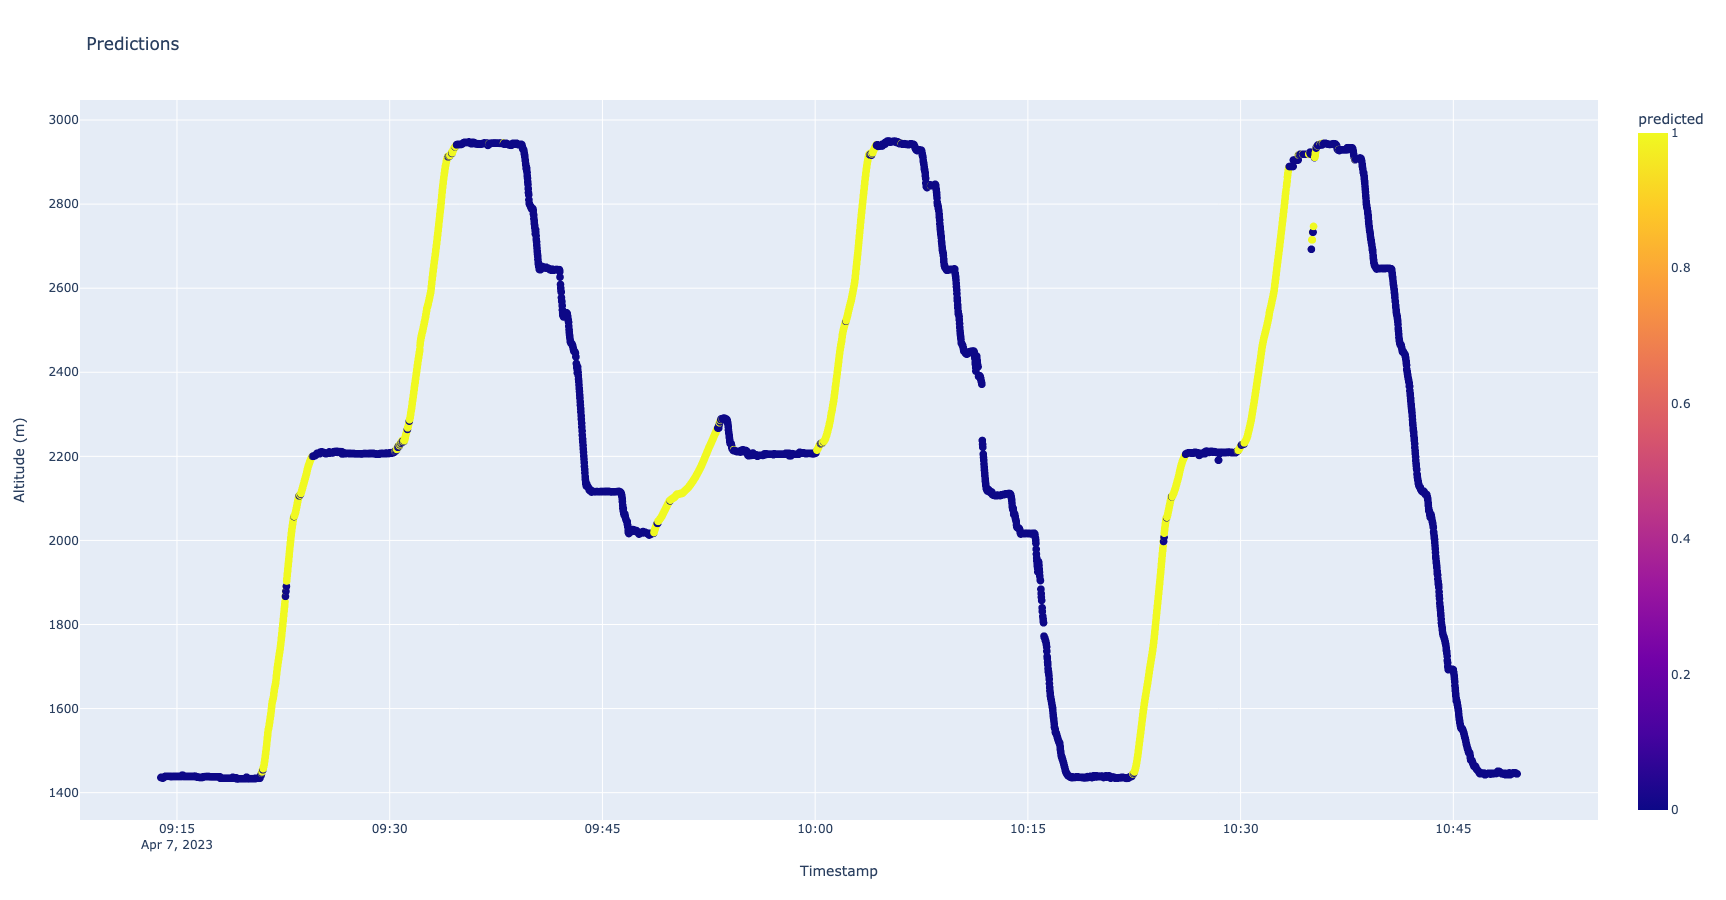

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,magZ(µT),calMagX(µT),calMagY(µT),calMagZ(µT),Cluster_1,on_lift,Alt(m)_change,Speed(m/s)_change,Course_change,predicted
0,2023-04-07 09:13:51.953,0.1534,-0.5180,-0.8395,-0.0108,0.0025,-0.0101,0.0166,0.0051,0.0318,...,-65.9999,-27.1108,6.9614,-7.9447,0,0,0.000000,0.0000,0.0,0
1,2023-04-07 09:13:52.957,0.1562,-0.5118,-0.8333,-0.0094,0.0023,0.0054,0.0042,0.0032,-0.0066,...,-66.4066,-26.8162,7.0748,-8.5435,0,0,0.425781,0.2534,0.0,0
2,2023-04-07 09:13:53.961,0.1508,-0.5035,-0.8493,-0.0059,0.0053,-0.0014,0.0020,0.0021,0.0225,...,-67.0690,-27.0917,7.1687,-9.2339,0,0,0.415528,-0.2209,0.0,0
3,2023-04-07 09:13:54.965,0.1604,-0.5134,-0.8229,-0.0070,0.0025,0.0136,0.0594,0.0147,0.0097,...,-66.2895,-26.4431,7.0141,-7.9350,0,0,-0.067871,0.3034,0.0,0
4,2023-04-07 09:13:55.969,0.1569,-0.5341,-0.8330,0.0065,-0.0080,0.0061,-0.0024,0.0176,0.0147,...,-66.0967,-28.3148,7.0149,-8.3881,0,0,0.000000,-0.5294,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712,2023-04-07 10:49:25.706,0.0250,-0.4418,-0.6918,0.0372,0.0828,0.1670,-0.2750,0.2061,0.1289,...,-95.5174,8.8651,-1.9811,-52.8440,0,0,-0.219116,-0.0491,3.1,0
5713,2023-04-07 10:49:26.710,0.0655,-0.4085,-1.0751,0.0679,0.0978,-0.2162,0.4758,-0.3229,0.2953,...,-94.6311,8.5441,-1.5877,-52.6320,0,0,-0.576172,-0.0773,4.5,0
5714,2023-04-07 10:49:27.713,0.1313,-0.4779,-1.4396,0.0376,0.0170,-0.5497,0.3940,0.0148,0.0588,...,-96.1813,9.2606,-0.4560,-53.5312,0,0,-0.507813,0.1346,13.7,0
5715,2023-04-07 10:49:28.717,0.0540,-0.4988,-0.8291,0.0248,-0.0423,0.0775,-0.1799,-0.2665,-0.2316,...,-95.8745,11.6254,0.2175,-53.1029,0,0,-0.191894,0.0755,-4.5,0


In [66]:
# Input an call this one function with your paths
predict_on_data(path_to_csv_file, file_path_to_model)

# Option 2: Go through functions step by step 

df=import_data(path_to_file_310)

In [21]:
df=calculate_alt_change(df)

In [23]:
df=calculate_speed_change(df)

In [25]:
df=calculate_course_change(df)

In [29]:
df=convert_datetime(df)

In [ ]:
features=select_features(df)

In [35]:
rfc=load_model(file_path_to_model)

In [ ]:
df=predict_on_features(rfc, df, features)

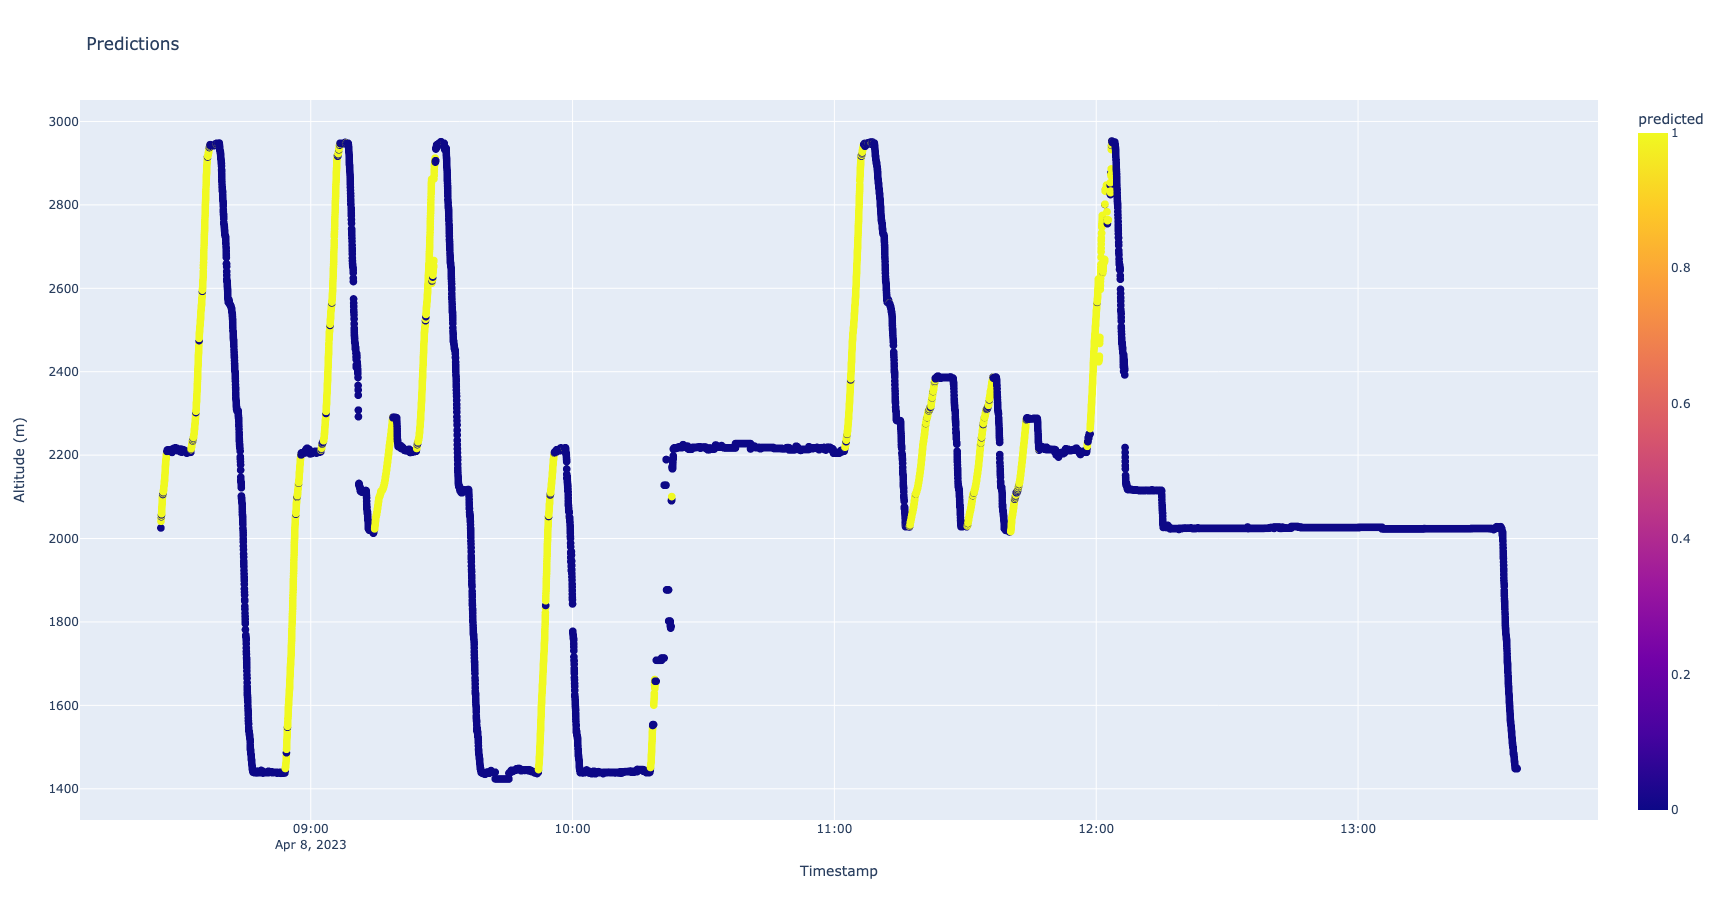

In [46]:
plot_prediction(df)